### 1.라이브러리 불러오기

일반 CPU 활용 시

In [1]:
# # 라이브러리 정의 
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np
# import pandas as pd

cuda nvidia gpu 활용 시

In [2]:
# How to check if the code is running on GPU or CPU?

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11831980020906399516
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10656990009627276224
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1434376601
locality {
  bus_id: 1
  links {
  }
}
incarnation: 59312112875582097
physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7343146099545310170
physical_device_desc: "device: XLA_GPU device"
]


intel gpu 활용 시

In [3]:
# import numpy as np
# import os

# # intel gpu 적용
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
# import keras
# # mnist 데이터셋 
# from keras.datasets import mnist


In [4]:
import warnings

In [5]:
warnings.filterwarnings(action="ignore")

In [6]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

### 2. 데이터 불러오기 및 분리

In [7]:
imageList = []
labelList = []
IMG_SIZE = 28

In [8]:
basedir = "../images/mnist/trainingSet/"

In [9]:
categories = os.listdir(basedir)

In [10]:
# 폴더 순환
for i in range (0, len(categories)):
    labelPath = os.path.join(basedir,categories[i])
    imagePath = os.listdir(labelPath)
    # 이미지 순환
    for j in range(0, len(imagePath)):
        imageFullPath = os.path.join(labelPath, imagePath[j])
        try:
            baseImg = cv2.imread(imageFullPath, cv2.IMREAD_GRAYSCALE)
            ### 1. 이미지 사이즈 변경
            refinedImg = cv2.resize(baseImg, (IMG_SIZE,IMG_SIZE))
            imageList.append(refinedImg)
            labelList.append(i)
        except Exception as e:
            print(e, imageFullPath)
            pass

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 ../images/mnist/trainingSet/0_zero\desktop.ini


In [11]:
imageArray = np.array(imageList)
labelArray = np.array(labelList)

In [12]:
print(imageArray.shape)
print(labelArray.shape)

(17999, 28, 28)
(17999,)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
trainingData_features,\
testData_features,\
trainingData_labels,\
testData_labels = \
train_test_split(imageArray, labelArray, test_size = 0.2, random_state=2)

In [15]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_labels.shape)
print(testData_labels.shape)

(14399, 28, 28)
(3600, 28, 28)
(14399,)
(3600,)


In [16]:
trainingData_features = trainingData_features.reshape(len(trainingData_features), 
                              IMG_SIZE, 
                              IMG_SIZE, 
                              1)
testData_features = testData_features.reshape(len(testData_features), 
                          IMG_SIZE, 
                          IMG_SIZE, 
                          1)

In [17]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_labels.shape)
print(testData_labels.shape)

(14399, 28, 28, 1)
(3600, 28, 28, 1)
(14399,)
(3600,)


In [18]:
trainingData_features_norm = trainingData_features/255.0
testData_features_norm = testData_features/255.0

In [19]:
### 접답지는 softmax랑 결합을 위한 onehot encoding

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
trainingData_labels_one = to_categorical(trainingData_labels)
testData_labels_one = to_categorical(testData_labels)

In [22]:
trainingData_labels_one[0]

array([0., 0., 1., 0., 0.], dtype=float32)

### 3. 모델 생성

In [23]:
inputShape = trainingData_features[0].shape
inputShape

(28, 28, 1)

In [24]:
outputShape = len(categories)

In [25]:
from tensorflow.keras import Sequential

In [26]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [27]:
# 모델생성 시작
model = Sequential()

In [28]:
model.add(Conv2D(filters=32,
                 kernel_size=3, 
                 padding="same", 
                 activation="relu",
                 input_shape=inputShape))

In [29]:
model.add(MaxPooling2D(pool_size= 2 ))

In [30]:
model.add(Dropout(rate=0.4)) # 사용한 비율을 설정

In [31]:
model.add(Conv2D(filters=32,
                 kernel_size=3, 
                 padding="same", 
                 activation="relu",
                 input_shape=inputShape))

In [32]:
model.add(MaxPooling2D(pool_size= 2 ))

In [33]:
model.add(Flatten())

In [34]:
model.add(Dense(units=outputShape, activation="softmax"))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 7

In [36]:
from tensorflow.keras.utils import plot_model

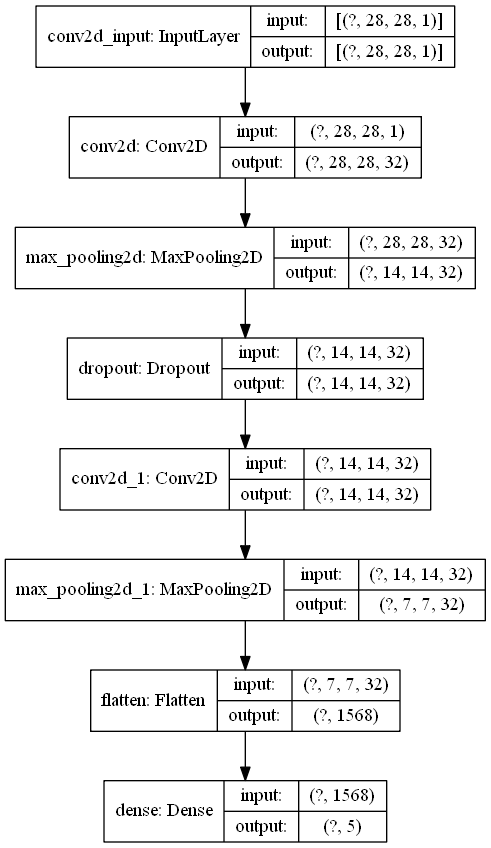

In [37]:
plot_model(model, show_shapes=True)

### 4. 모델 컴파일 (loss, metrics, optimizer)

In [38]:
# model.compile(loss=keras.losses.categorical_crossentropy, 
#               optimizer= keras.optimizers.Adam(),
#               metrics=["accuracy"] )

In [39]:
model.compile(loss="categorical_crossentropy", 
              optimizer= "adam",
              metrics=["accuracy"] )

### 5. 모델 학습(훈련)

In [40]:
epochNo = 5

In [41]:
len(trainingData_features_norm)

14399

In [42]:
33600 / 32

1050.0

In [43]:
model.fit(x=trainingData_features_norm, 
          y=trainingData_labels_one,
          epochs=epochNo,
          batch_size=32,
          validation_data=(testData_features_norm, testData_labels_one) )

Epoch 1/5
450/450 [==============================] - 3s 7ms/step - loss: 0.1965 - accuracy: 0.9399 - val_loss: 0.0683 - val_accuracy: 0.9792
Epoch 2/5
450/450 [==============================] - 3s 6ms/step - loss: 0.0535 - accuracy: 0.9838 - val_loss: 0.0400 - val_accuracy: 0.9872
Epoch 3/5
450/450 [==============================] - 3s 6ms/step - loss: 0.0383 - accuracy: 0.9874 - val_loss: 0.0313 - val_accuracy: 0.9908
Epoch 4/5
450/450 [==============================] - 3s 6ms/step - loss: 0.0269 - accuracy: 0.9911 - val_loss: 0.0253 - val_accuracy: 0.9917
Epoch 5/5
450/450 [==============================] - 3s 7ms/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.0226 - val_accuracy: 0.9917


### 6. 모델 추론

In [44]:
model.evaluate(x = testData_features_norm,
               y = testData_labels_one)

113/113 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9917


[0.022615358233451843, 0.9916666746139526]

### 7. 모델 예측

In [45]:
def refineImage(testImg):

    # 사이즈 조정
    IMG_SIZE=28  
    # 컬러이미지 -> 회색톤으로 변경
    img_gray = cv2.cvtColor(testImg, cv2.COLOR_RGB2GRAY)
    img_resize = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE))
    ### shape 변경
    img_shape = img_resize.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    ### 정규화
    img_norm = img_shape/255.0
    return img_norm

In [46]:
testData = cv2.imread("./sample_mnist.jpg", cv2.IMREAD_COLOR)

In [47]:
refinedImageOne = refineImage(testData)

In [48]:
predictValue = np.argmax(model.predict(refinedImageOne))
predictValue

3

### 모델 저장

In [49]:
# 모델구조저장
model_json = model.to_json()

with open("./model_mnist.json","w") as json_file:
    json_file.write(model_json)

model.save_weights("./model_mnist_weight.h5")

### gpu 종료

In [50]:
from tensorflow.keras import backend as K

K.clear_session()

from numba import cuda
cuda.select_device(0)
cuda.close()